<h2> Finding the best Channel Model for an Optical Fiber Channel </h2>

<h3> Step 1 - Obtain fraction of the dataset and split it into train,test, and validation subsets </h3>
We obtain a fraction, because the original dataset size is huge and would take too long if we used all of it. 

In [4]:
import pandas as pd
import numpy as np

# Function to obtain training, validation, and testing datasets
def obtain_datasets(fraction):
    # Helper function to load a fraction of the dataset
    def load_fraction(file_path, fraction):
        # Load the entire dataset
        full_data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=["Time", "Amplitude"]).to_numpy()
        
        # Calculate the number of rows to load
        num_rows = int(len(full_data) * fraction)
        
        # Select the first `num_rows` rows (contiguous block)
        sampled_data = full_data[:num_rows]
        
        return sampled_data

    # Load sub-versions of each dataset
    pam_input_data = load_fraction("data/PAM-4 Input Data.txt", fraction)
    pam_output_data = load_fraction("data/PAM-4 Output Data.txt", fraction)

    qpsk_input_data = load_fraction("data/QPSK Input Data.txt", fraction)
    qpsk_output_data = load_fraction("data/QPSK Output Data.txt", fraction)

    qam_input_data = load_fraction("data/16-QAM Input Data.txt", fraction)
    qam_output_data = load_fraction("data/16-QAM Output Data.txt", fraction)

    # Helper function to split into train, validation, and test sets
    def obtain_train_validate_test(data):
        # Compute sizes
        train_size = int(0.7 * len(data))
        val_size = int(0.15 * len(data))
        test_size = len(data) - train_size - val_size

        # Perform splits
        train_data = data[:train_size]
        val_data = data[train_size:train_size + val_size]
        test_data = data[train_size + val_size:]

        return train_data, val_data, test_data

    # Split PAM datasets
    pam_train_input, pam_val_input, pam_test_input = obtain_train_validate_test(pam_input_data)
    pam_train_output, pam_val_output, pam_test_output = obtain_train_validate_test(pam_output_data)

    # Split QPSK datasets
    qpsk_train_input, qpsk_val_input, qpsk_test_input = obtain_train_validate_test(qpsk_input_data)
    qpsk_train_output, qpsk_val_output, qpsk_test_output = obtain_train_validate_test(qpsk_output_data)

    # Split QAM datasets
    qam_train_input, qam_val_input, qam_test_input = obtain_train_validate_test(qam_input_data)
    qam_train_output, qam_val_output, qam_test_output = obtain_train_validate_test(qam_output_data)

    # Organize everything into a dictionary for easy access
    datasets = {
        "PAM": {
            "train": (pam_train_input, pam_train_output),
            "validate": (pam_val_input, pam_val_output),
            "test": (pam_test_input, pam_test_output)
        },
        "QPSK": {
            "train": (qpsk_train_input, qpsk_train_output),
            "validate": (qpsk_val_input, qpsk_val_output),
            "test": (qpsk_test_input, qpsk_test_output)
        },
        "QAM": {
            "train": (qam_train_input, qam_train_output),
            "validate": (qam_val_input, qam_val_output),
            "test": (qam_test_input, qam_test_output)
        }
    }

    return datasets


Testing this function

/tmp/ipykernel_9656/2769411352.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  full_data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=["Time", "Amplitude"]).to_numpy()
/tmp/ipykernel_9656/2769411352.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  full_data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=["Time", "Amplitude"]).to_numpy()
/tmp/ipykernel_9656/2769411352.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  full_data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=["Time", "Amplitude"]).to_numpy()
/tmp/ipykernel_9656/2769411352.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be 

PAM Training Input Shape: (36699, 2)
PAM Training Output Shape: (36699, 2)


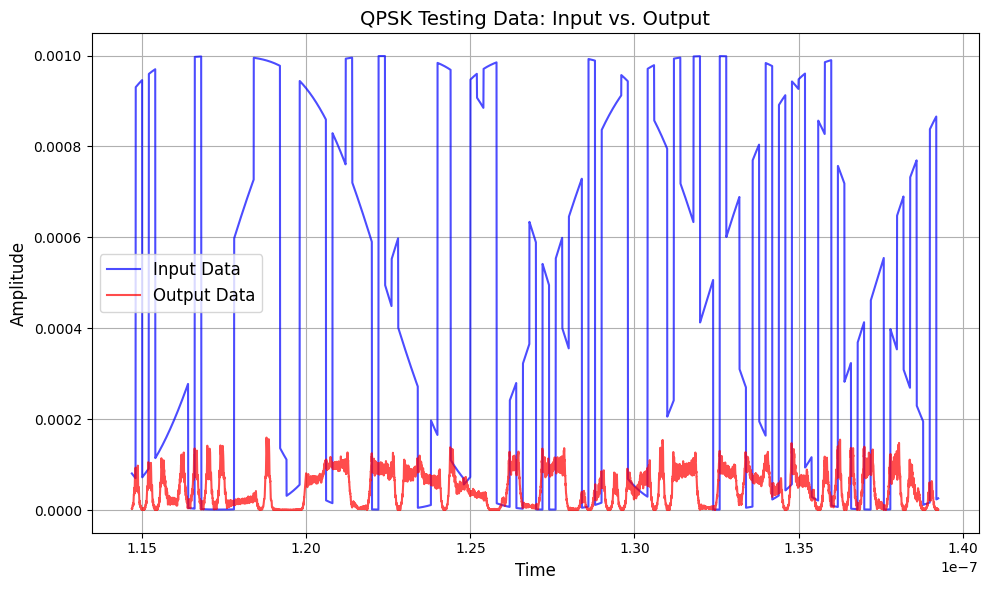

In [6]:
import matplotlib.pyplot as plt


# Specify the fraction of data to use (e.g., 0.1 for 10%)
fraction = 0.05

# Get the datasets
datasets = obtain_datasets(fraction)

# Access the PAM training dataset
pam_train_input, pam_train_output = datasets["PAM"]["train"]

# Access the QPSK validation dataset
qpsk_val_input, qpsk_val_output = datasets["QPSK"]["validate"]

# Access the QAM test dataset
qam_test_input, qam_test_output = datasets["QAM"]["test"]

print("PAM Training Input Shape:", pam_train_input.shape)
print("PAM Training Output Shape:", pam_train_output.shape)



# Plot the PAM training data
plt.figure(figsize=(10, 6))

# Input data plot
plt.plot(qpsk_val_input[:, 0], qpsk_val_input[:, 1], label="Input Data", color="blue", alpha=0.7)

# Output data plot
plt.plot(qpsk_val_output[:, 0], qpsk_val_output[:, 1], label="Output Data", color="red", alpha=0.7)

# Add labels and legend
plt.title("QPSK Testing Data: Input vs. Output", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


<h3>Step 2 - Data Processing </h3>

<h3>Step 3 - NN Models </h3>

In [7]:
import torch 
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# Create a model Class that inherits the nn.Module 

class Model(nn.module):
    # Input later  